In [1]:
from qbuki import *

In [10]:
#P = rand_probability_table(4,4,3);
P = rand_quantum_probability_table(2, 12, 12, r=1, field="real")

In [11]:
gpt = GPT.from_probability_table(P)

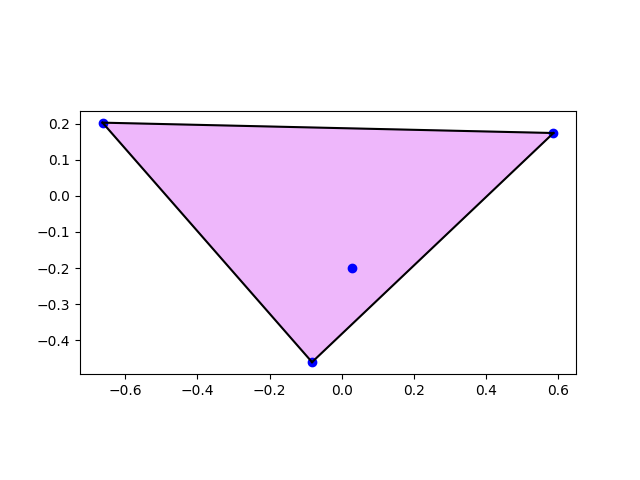

In [12]:
%matplotlib ipympl
plot_convex_hull(gpt.state_space)

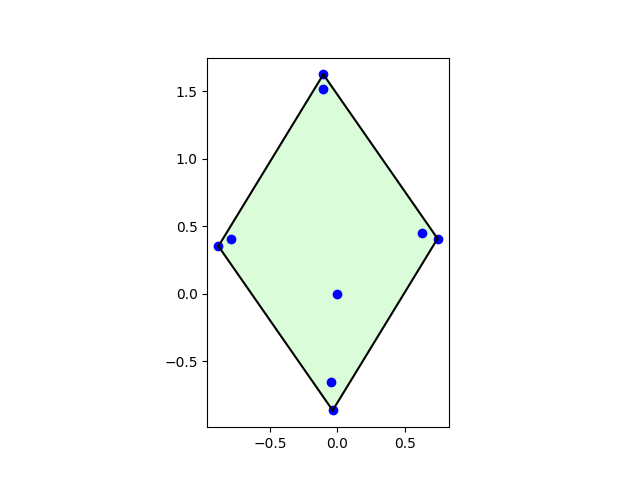

In [13]:
%matplotlib ipympl
plot_convex_hull(gpt.logical_state_space)

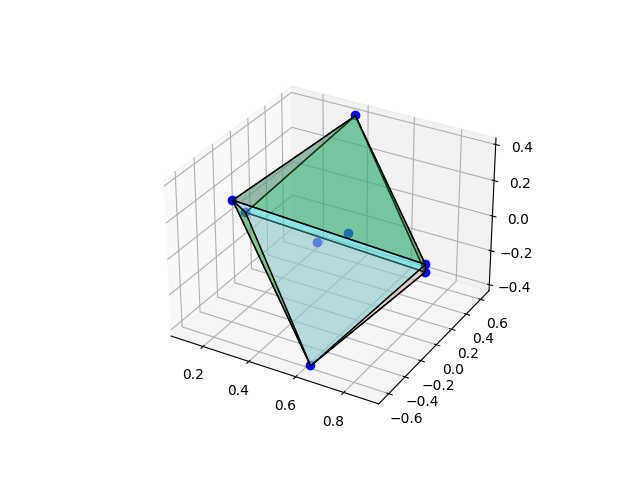

In [14]:
%matplotlib ipympl
plot_convex_hull(gpt.effect_space)

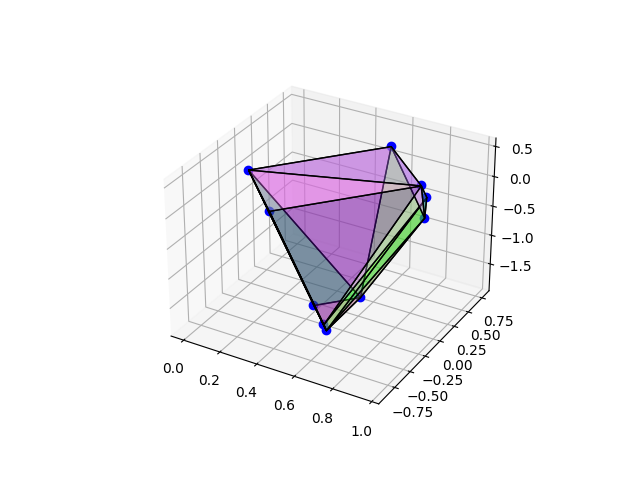

In [15]:
%matplotlib ipympl
plot_convex_hull(gpt.logical_effect_space)

In [38]:
%matplotlib ipympl
plot_convex_hull(gpt.logical_effect_space, points=gpt.logical_effect_space.points[:, :-1], fill=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [35]:
%matplotlib ipympl
plot_convex_hull(gpt.logical_effect_space, points=gpt.logical_effect_space.points[:, 1:], fill=False)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [5]:
E = GPTEffects(gpt.sample_measurement(4))

In [8]:
rho = gpt.sample_states(1)
rho

array([[ 1.   ],
       [-0.554],
       [-0.195],
       [-0.088]])

In [9]:
p = E << rho; p

array([[0.485],
       [0.168],
       [0.19 ],
       [0.157]])

In [10]:
E << p

array([[ 1.   ],
       [-0.554],
       [-0.195],
       [-0.088]])

In [11]:
S = GPTStates(gpt.sample_states(4))

In [16]:
F = GPTEffects(gpt.sample_measurement(4))

In [17]:
(F|S) @ (~E|S) @ (E << rho)

array([[0.219],
       [0.351],
       [0.221],
       [0.209]])

In [18]:
F << rho

array([[0.219],
       [0.351],
       [0.221],
       [0.209]])

In [14]:
P_noisy = P + np.random.normal(loc=0, scale=0.001, size=P.shape)
P_noisy[P_noisy < 0] = 0
P_noisy[P_noisy > 1] = 1
F = rank_approximation(P_noisy, 4)
print(np.linalg.svd(F)[1])
print(np.all(F >= 0) and np.all(F <= 1))

[14.938  2.811  2.096  1.694  0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.   ]
True
